<a href="https://colab.research.google.com/github/moon2su/ML-programming/blob/main/TSLA_LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [50]:
df = df.drop(columns=["Date", "Adj Close", "Volume"])

In [51]:
feature_cols = ['Open', 'High', 'Low']
data = df[feature_cols + ['Close']].values

In [52]:
# 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [53]:
# 시계열 윈도우 함수 정의
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # 지난 60일 데이터를 기반으로 다음 날 예측
X, y = create_dataset(scaled_data, time_step)

In [54]:
# 입력을 (samples, time_steps, features) 형태로 변환
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [55]:
# 5️⃣ 훈련/테스트 데이터 분리 (80% / 20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [58]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_step, X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dense(32),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 2.5106e-04 - val_loss: 9.8905e-06
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 6.3300e-06 - val_loss: 1.0262e-05
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 7.6298e-06 - val_loss: 1.2705e-05
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 6.9653e-06 - val_loss: 8.4791e-06
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 5.5245e-06 - val_loss: 9.1978e-06
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 5.7515e-06 - val_loss: 7.7600e-06
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 6.2576e-06 - val_loss: 9.5794e-06
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 5.2920e-06 - val_loss: 7.0845e-06
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 5.1341e-06 - val_loss: 1.1261e-05
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 6.0625e-06 - val_loss: 7.5189e-06
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss

In [62]:
# 7️⃣ 예측
y_pred_scaled = model.predict(X_test)

# 정규화 복원
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test.reshape(-1, 1))

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [63]:
# 8️⃣ MSE 계산
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 23.799963070179146


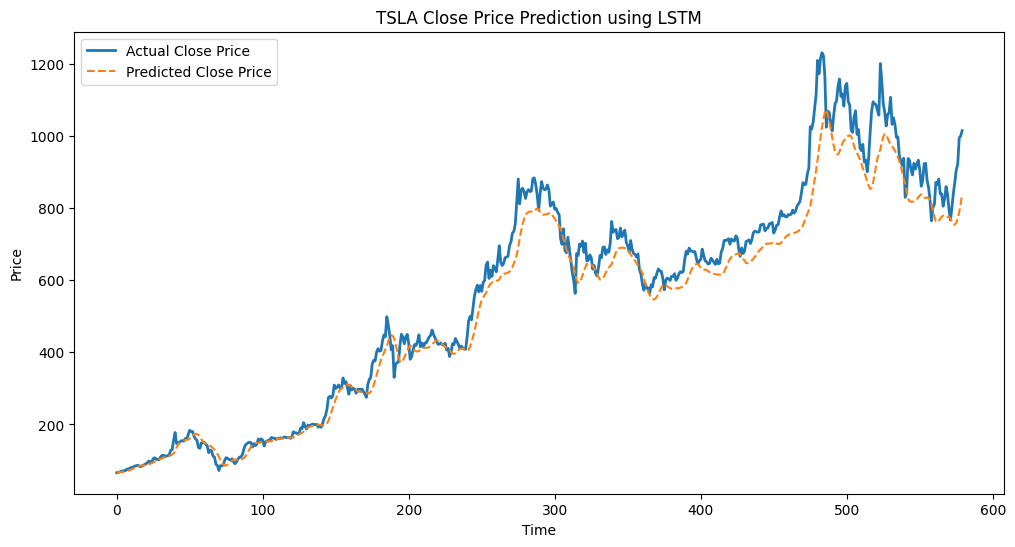

In [65]:
# 9️⃣ 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Close Price', linewidth=2)
plt.plot(y_pred_inv, label='Predicted Close Price', linestyle='--')
plt.title('TSLA Close Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [68]:
# SimpleRNN 모델 구성
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(time_step, X_train.shape[2])),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=False),
    Dense(32),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0100 - val_loss: 1.3341e-05
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1.6857e-04 - val_loss: 4.2090e-05
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 1.0691e-04 - val_loss: 6.1113e-05
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.6183e-05 - val_loss: 1.0243e-05
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.7608e-05 - val_loss: 4.2809e-05
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 1.1573e-04 - val_loss: 6.0341e-04
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.6130e-04 - val_loss: 1.1216e-05
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 1.0591e-04 - val_loss: 6.0264e-05
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.0929e-05 - val_loss: 7.1228e-05
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 5.6076e-05 - val_loss: 2.3512e-05
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.

In [70]:
# 예측 및 역정규화 (y_scaler만 사용)
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test.reshape(-1, 1))

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [71]:
# MSE 계산
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 33.50634282020319


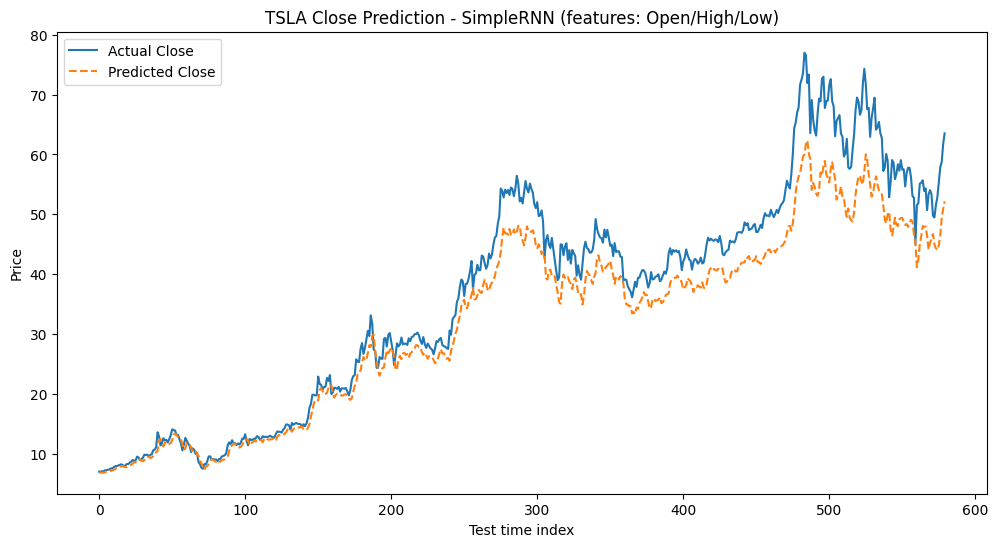

In [72]:
# 시각화 (테스트 구간: 실제 vs 예측)
plt.figure(figsize=(12,6))
plt.plot(y_true, label="Actual Close")
plt.plot(y_pred, label="Predicted Close", linestyle="--")
plt.title("TSLA Close Prediction - SimpleRNN (features: Open/High/Low)")
plt.xlabel("Test time index")
plt.ylabel("Price")
plt.legend()
plt.show()